# Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

## Intro

Matplotlib est une librairie très riche mais aussi asssez bordélique. Sans l'aide d'internet, il est difficile de trouver les bonnes commandes, et quand on surfe on a l'impression qu'il y a des tas de syntaxes différentes pour faire la même chose. Voilà pour les mauvaises nouvelles. La bonne nouvelle c'est que `matplotlib`  fait de chouettes graphiques. 

Ce chapitre tente une présentation assez complète (donc un peu ennuyante) et explique le lien entre les deux syntaxes principales: l'explicite et l'implicite. Lisez ce chapitre rapidement pour vous rendre compte de tout ce qu'on peut faire. Revenez dessus quand nécessaire.

##  Figure et boites-graphiques

Nos commençons par des considération de mise en page. Ce n'est pas le plus pationnant, mais sans cela on ne comprend pas la suite. 


### une figure, plusieurs boites-graphiques

L'initialisation d'un graphique se fait en deux étapes:

* on définit d'abord la figure, qu'on nome traditionnellement `fig` et qui représente la fenêtre.
* puis dans la figure on définit une ou plusieurs boites-graphiques, qu'on nome traditionnellement `ax` (pour 'axes').    

Effectuons cela de deux manières différentes

In [64]:
""" Les données à tracer"""
x=np.linspace(0,20,100)
y=np.cos(x)
y_prime=np.sin(x)

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


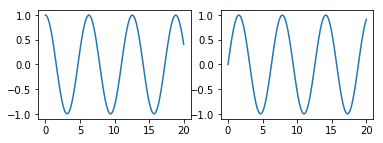

In [71]:
""" Première manière, avec 'fig.add_subplot()' """
fig=plt.figure(figsize=(6,2))
ax0=fig.add_subplot(1,2,1) # dans une grille de 1 ligne, 2 colonnes, on ajoute la première boite-graphique 
ax0.plot(x,y)
ax1=fig.add_subplot(1,2,2) # dans une grille de 1 ligne, 2 colonnes, on ajoute la seconde boite-graphique
ax1.plot(x,y_prime);
print(type(fig))
print(type(ax0))

***Attention:*** `fig.add_subplot(n,m,i)` crée la i-ième boite-graphique dans une grille $n\times m$ mais   la numérotation des boites commence à 1!!! 

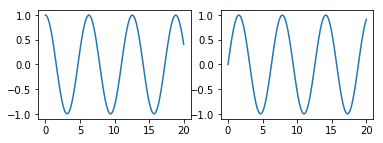

In [66]:
""" Seconde manière avec 'plt.subplots(1,2)' """
fig,axs=plt.subplots(1,2,figsize=(6,2)) # on crée la figure et les 2 boites-graphiques d'un coup
axs[0].plot(x,y)
axs[1].plot(x,y_prime);

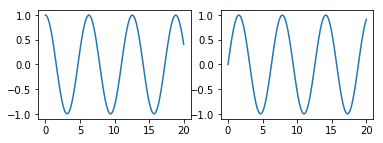

In [67]:
""" Seconde manière, variante """
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(6,2))
ax0.plot(x,y)
ax1.plot(x,y_prime);

***Attention-suite:*** `plt.subplots(n,m)` crée une grille de $n\times m$ boite graphique. Il renvoie un tenseur numpy, et donc la numérotation commence à 0 cette fois-ci. 

***A vous:*** Il y a une incongruïté mathématique dans les graphes précédent. L'avez-vous $(1\heartsuit)$ vue?

### Plusieurs figures

Dans les notesbook les figures s'ampilent les une sur les autres. Mettre plusieurs figure est donc équivalent à faire des subplots verticaux; sauf que l'on peut changer la couleur autour, youpi! 

Par contre, en dehors de matplotlib, chaque figure s'ouvre dans une fenêtre différente! 

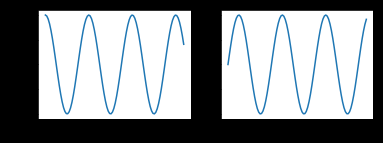

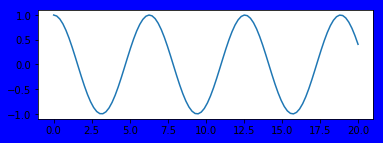

In [51]:
figA,(axA0,axA1)=plt.subplots(1,2,figsize=(6,2),facecolor='black')
axA0.plot(x,y)
axA1.plot(x,y_prime);

figB,axB=plt.subplots(1,1,figsize=(6,2),facecolor='blue')
axB.plot(x,y);

### Une boite-graphique 3D

La seconde manière est plus longue (surtout si on veut 16 boites graphiques) mais elle permet de faires des boites-graphiques 3D avec: `ax=fig.add_subplot(1,2,1, projection='3d')`  

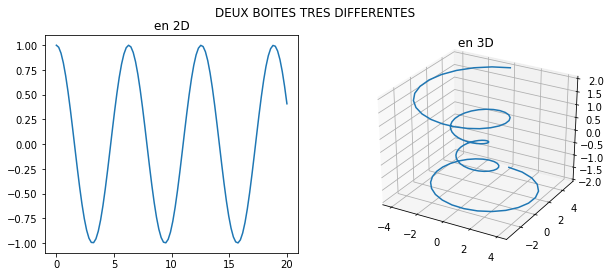

In [72]:
""" Première manière avec une des deux boites en 3d"""
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,4))
fig.suptitle("DEUX BOITES TRES DIFFERENTES")

ax0=fig.add_subplot(1,2,1) 
ax0.set_title("en 2D")
ax0.plot(x,y)

#----------------------------------
z3 = np.linspace(-2, 2, 100)
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
r3 = z3**2 + 1
x3 = r3 * np.sin(theta)
y3 = r3 * np.cos(theta)
ax1=fig.add_subplot(1,2,2, projection='3d') #  la seconde boite-graphique est en 3d
ax1.set_title("en 3D")
ax1.plot(x3,y3,z3);

### Des boites-graphiques partageant les graduations

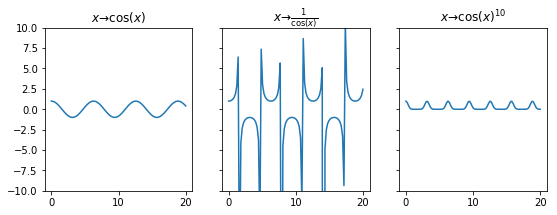

In [73]:
"Un vecteur de trois boites-graphiques"

fig,axs=plt.subplots(1,3,sharey=True,figsize=(9,3))
#variante: fig,(ax0,ax1,ax2)=plt.subplots(1,3)

"Attention axis[0,0] provoque une erreur car on a crée un vecteur"
axs[0].plot(x,y)
axs[0].set_title(r"$x \to \cos(x)$")

axs[1].plot(x,1/y)
axs[1].set_title(r"$x \to \frac {1}{\cos(x)}$")
axs[1].set_ylim([-10,10])

axs[2].plot(x,y**10)
axs[2].set_title(r"$x \to \cos(x)^{10}$");

***A vous:*** 

* Les asymptotes (=pic) horizontaux n'ont pas toute la même hauteur. Bizarre, corrigez ($1\heartsuit$)! 
* En remplaçant `y=np.cos(x)` par `y=np.sin(x)` cela bug, expliquez ($2\heartsuit$) pourquoi?
* Mettez ($2\heartsuit$) ces trois graphiques en colonne, et faites qu'ils partagent les même graduation en abscisses. 

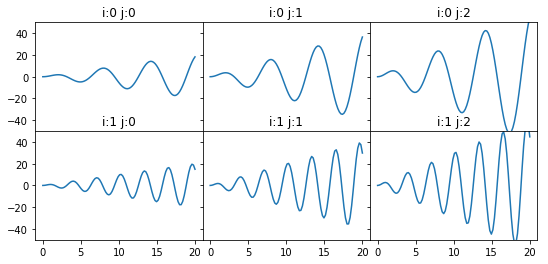

In [54]:
"Une matrice de $2\times 3$ boites-graphiques"
fig,ax=plt.subplots(2,3,sharex=True,sharey=True,figsize=(9,3))
#variante: fig,((ax0,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(1,3)

"on supprime les marges qui sont mises par défaut. On pourrait aussi les augmenter"
fig.subplots_adjust(wspace=0.,hspace=0)

for i in range(2):
    for j in range(3):
        ax[i,j].plot(x,np.sin((i+1)*x)*(j+1)*x)
        ax[i,j].set_title("i:"+str(i)+" j:"+str(j))
        """On met une même échelle pour comparer les graphiques"""
        ax[i,j].set_ylim([-50,50])


### Emboitements tordus

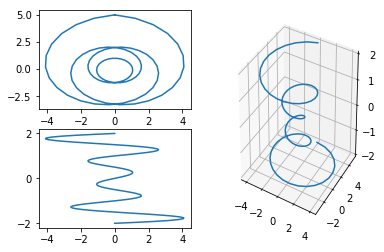

In [57]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(1,2,2, projection='3d')
ax1.plot(x3,y3)
ax2.plot(x3,z3)
ax3.plot(x3,y3,z3);

***A vous:*** Ajoutez $(1\heartsuit)$ le tracez de `z3` en fonction de `y3` sur la même figure; agrandissez-là un peu.  

### Espacement des boites-graphiqus

On peut utiliser `fig.subplots_adjust(wspace=0.6,hspace=0.6)` mais la fonction vraiment magique 
c'est `fig.tight_layout(w_pad=4, h_pad=2)`

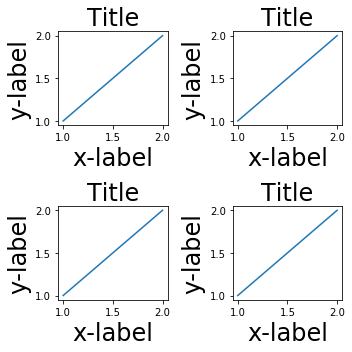

In [75]:
def example_plot(ax):
    fontsize=24
    ax.plot([1, 2],[1,2])
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(5,5))
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
fig.tight_layout()
"si on veut un miste en page moins 'tight' "
#fig.tight_layout( w_pad=4, h_pad=2)
"le mot 'pad' signiife 'padding' (=espacement)";

## La syntaxe implicite

Cette syntaxe implicite est très utilisée mais elle est en voie d'obsolécence. Le mot 'implicite' vient du fait que l'on ne nome pas explicitement la figure `fig` et les boites graphiques `ax`.

In [59]:
"""les données"""
x=np.linspace(0,4*np.pi,100)
y=np.sin(x)

### une syntaxe plus courte

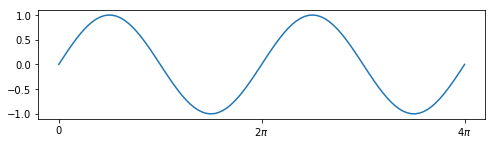

In [60]:
plt.figure(figsize=(8,2))
plt.plot(x,y)
plt.xticks([0,2*np.pi,4*np.pi],["0",r"$2\pi$",r"$4\pi$"]);

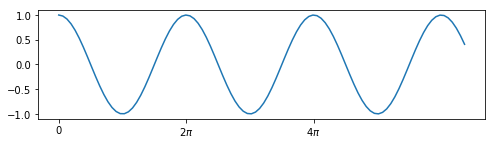

In [79]:
"au lieu de"
fig,ax=plt.subplots(figsize=(8,2))
ax.plot(x,y)
ax.set_xticks([0,2*np.pi,4*np.pi])
ax.set_xticklabels(["0",r"$2\pi$",r"$4\pi$"]);

### Plusieurs boites

La syntaxe implicite permet aussi de faire plusieurs boites-graphique. Mais observez-bien: il y a une notions de "boite-graphique" courrante dans lequel on trace les `plt.plot()`

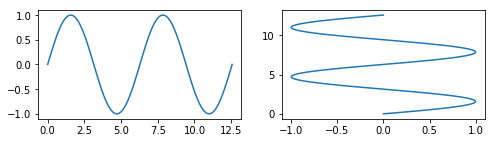

In [62]:
plt.figure(figsize=(8,2))
plt.subplot(1,2,1) 
plt.plot(x,y)
"""changement de boite graphique"""
plt.subplot(1,2,2) 
plt.plot(y,x);

### Comment retrouver figure et boites-graphiques? 

Cette partir est un peu technique. Lisez-là si vous voulez comprendre le lien entre la syntaxe implicite et explicite. 

En implicite, une figure courante est automatiquement crée. Puis quand on écrit `plt.subplot(1,2,1)` une boite graphique courante est automatiquement crée. On peut récupérer la figure courante avec `plt.gcf()` et la boite graphique courante avec `plt.gca()` ou bien comme le résultat de `plt.subplot(1,2,1)`. La preuve:

ax1 is ax2: False
aa is ax1: True
fig1 is fig2: True


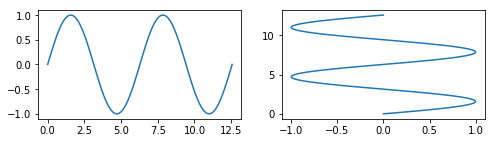

In [63]:
plt.figure(figsize=(8,2))
aa=plt.subplot(1,2,1)
plt.plot(x,y)

fig1=plt.gcf() #-> figure
ax1=plt.gca()  #-> boite (=axes)

plt.subplot(1,2,2)
plt.plot(y,x)

fig2=plt.gcf() #-> figure
ax2=plt.gca()  #-> boite (=axes)

print("ax1 is ax2:",ax1 is ax2)
print("aa is ax1:",aa is ax1)
print("fig1 is fig2:",fig1 is fig2)

#En syntaxe explicite les choses seraient plus explicite!"
#fig,(ax1,ax2)=plt.subplots(1,2)
#fig.set_size_inches(8,2)
#ax1.plot(x,np.sin(x))
#ax2.plot(np.sin(x),x);

### Attention aux variations (Grrrr)

La syntaxe implicite permet de changer directement les options de la boite-graphique courante. Exemple:

* `plt.legend()`: pour que les labels s'affichent.  
* `plt.ylim()`: limite les ordonnées
* `plt.xticks()`: les graduations en `x`

Ce qui est l'équivalent de:

* `ax.legend()`  
* `ax.set_ylim()`
* `ax.set_xticks()`

Et il y a plein de gag comme par exple le

    plt.xticks([0,2*np.pi,4*np.pi],["0",r"$2\pi$",r"$4\pi$"]);

du début. Ces variation sont très pénibles: même sur l'aide officielle ils utilisent un coup la syntaxe implicite, un coup l'explicite.

## Les courbes

Assez parler de la forme, parlons du contenu!  

### Une exemple complet

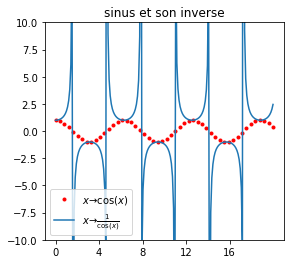

In [47]:
x=np.linspace(0,20,200)
x_=np.linspace(0,20,50)

fig,ax=plt.subplots() # une figure, une seule case. 

ax.plot(x_,np.cos(x_),"r.",label=r"$x \to \cos(x)$")
ax.plot(x,1/np.cos(x),label=r"$x \to \frac {1}{\cos(x)}$")

ax.set_aspect("equal") #même échelle en abscisse et en ordonnée
ax.set_ylim([-10,10]) #limitation des ordonnées
ax.set_xticks(np.linspace(0,20,5,endpoint=False)) #graduations
ax.set_title("sinus et son inverse")
ax.legend();

### Courbe 3D

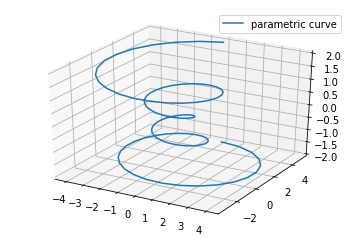

In [48]:
"cet import est necessaire même si le mot clef 'Axes3D' n'apparait pas ensuite. "
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend();

### Une courbe de couleur changeante

Cela peut-être pratique quand veut représenter une courbe paramétrique $x(t),y(t)$ en montrant l'écoulement du temps $t$. 

(-1.1, 1.1)

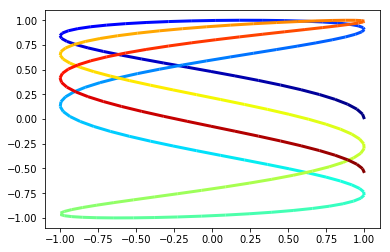

In [2]:
from matplotlib.collections import LineCollection

t = np.linspace(0, 10, 200) #time
x = np.cos(np.pi * t)
y = np.sin(t)
points = np.array([x, y]).T.reshape(-1, 1, 2)
"on crée une collection de segments"
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap="jet",norm=plt.Normalize(0, 10))
"on précise que la couleur doit varier en fonction de t"
lc.set_array(t)
lc.set_linewidth(3)

fig,ax=plt.subplots()
ax.add_collection(lc)
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)

***A vous:*** Créez $(4\heartsuit)$ une courbe paramétrique 3D de couleur changeante. 

### résumé des arguments principaux de .plot()


1/ Arguments obligatoires

* `x`: la listes des abscisses 
* `y`: la liste des ordonnées


2/ L'argument qui défini le style de trait. Que l'on met toujours en troisème position. Mais il est facultatif. 

*  Cela peut-être une couleur, mais si on ne la précise pas, la couleur change à appel de `ax.plot()`
    * `"r"`: ***r***ed
    * `"k"`: blac***k***
    * `"b"`: ***b***lue
* Cela peut-être un symbole, ex:     
    * `"."`:  des petits points
    * `"o"`:  des gros points
    * `"o-"`: des gros points et en trait plein
* Cela peut-être un mélange, ex:

    * `"r."`:  des petits points red
    * `"ko"`:  des gros points black
    * `"go-"`: devinez!
    

3/ Arguments facultatifs

* `label=`: une chaine de caractére associée à chaque courbe. Ne pas oublié d'appeler `ax.legend()` pour que les labels s'affichent
* `lw=2`: épaisseur du trait (=lineWidth)



## ticks, labels et texte

### Latex

On peut utiliser latex dans toutes les textes de matplotlib, mais attention à la syntaxe: `r"$...$"`. Le `r` devant les guillemets signifie `raw`, et cela indique à python de ne pas interpréter les catactères spéciaux. 

### Exemples complets

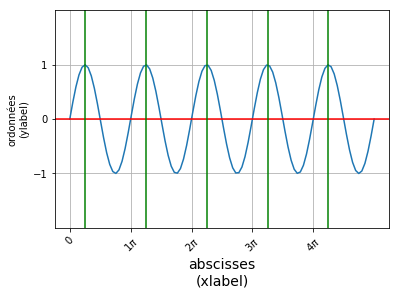

In [45]:
"données"
right=10*np.pi
x=np.linspace(0,right,100)
y=np.sin(x)
pis=np.arange(0,right,2*np.pi)
maxis=pis+np.pi/2

"plot"
fig,ax=plt.subplots()
ax.plot(x,y)
ax.grid(True)

"ticks"
xticks_text=["0"]
for i in range(1,len(pis)): xticks_text.append(str(i)+r"$\pi$")    
ax.set_xticks(pis)
ax.set_xticklabels(xticks_text,rotation=45)
ax.set_yticks([-1,0,1])
#version implicite:
# plt.xticks(maxis,xticks_text)

"label"
ax.set_xlabel("abscisses\n(xlabel)",fontsize=14)
ax.set_ylabel("ordonnées\n(ylabel)")
ax.set_ylim(-2,2)
ax.axhline(0.,c="r")
for x in maxis: ax.axvline(x,c="g")
#plt.title("test line spacing for multiline text")

Text(0,0.5,'âges')

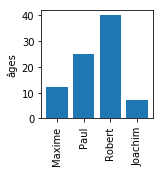

In [4]:
ages=[12,25,40,7]
names=["Maxime","Paul","Robert","Joachim"]
"plot"
fig,ax=plt.subplots()
fig.set_size_inches(2,2)
ax.bar([1,2,3,4],ages)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(names,rotation=90)
ax.set_ylabel("âges")

## Surface: en niveaux de couleurs ou en 3D

Pour observer le graphe d'une fonction de $\mathbb R^2$ dans $\mathbb R$, on peut faire un graphique en 3d (cf. plus bas). Mais personnellement je trouve que les tracés en niveau de couleur sont beaucoup plus clair: la couleur remplace la troisème dimmension.

### Afficher une matrice

Par défaut: l'echelle des couleurs va du bleu foncé au jaune clair. 

***Conseil:*** dès que vous avez plusieurs boites-graphiques, précisez à la main l'échelle de couleur. 

[[-10   2   3]
 [  4   5   6]
 [  7   8   9]
 [ 10  11  12]
 [ 13  14  15]]


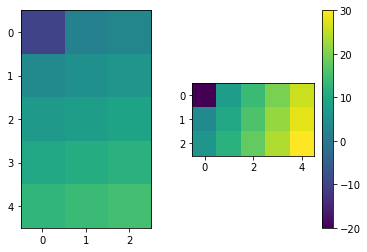

In [6]:
M=np.array([[-10,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
print(M)

fig,ax=plt.subplots(1,2)
img0=ax[0].imshow(M,vmin=-20, vmax=30) # on précise l'échelle de couleur
img1=ax[1].imshow(2*M.T,vmin=-20, vmax=30)

"""Attention, il faut passer le résultat de imshow() en argument de colorbar(). """
fig.colorbar(img0); #on aurait pu mettre `img1`: cela ne change rien quand on précise vmin et vmax

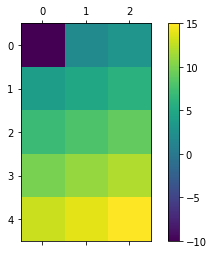

In [7]:
""" une variante : dans certaines version de matplotlib, 
ax.imshow() lisse les carrés automatiquement, mais pas ax.matshow() """
fig,ax=plt.subplots()
img=ax.matshow(M)
fig.colorbar(img); #on n'a pas préciser vmin et vmax, se sera le min et le max de la matrice

### Afficher le graphe d'une fonction

Maintenant on va voir comment on crée le graphe d'une fonction de $\mathbb R^2$ dans $\mathbb R$. On commence par crée deux matrices où l'on répette les abscisses et les ordonnées. 

XX
 [[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]]
YY
 [[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1]
 [1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2]
 [1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3]
 [1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
 [1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6]
 [1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7]
 [1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8]
 [1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9]
 [2.

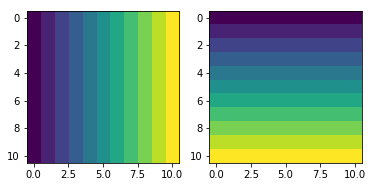

In [8]:
x=np.linspace(0,2,11)
y=np.linspace(1,2,11)

XX,YY=np.meshgrid(x,y)

print("XX\n",XX)
print("YY\n",YY)

fig,ax=plt.subplots(1,2)
ax[0].imshow(XX);
ax[1].imshow(YY);

Ensuite, on utilise nos tableaux d'abscisse et d'ordonnées `XX` et `YY` comme si c'était les variables de la fonction $F(x,y)$ que l'on veut tracer. Observez, puis analyser pourquoi cela fonctionne. Dans le code ci-dessous on utilise aussi des options itérésentent de `plt.imshow()`:

* `origin='lower'`: pour mettre l'origine en bas comme on aime en math. Attention, par défaut `origin='upper'`: car c'est la convention classique des écrans.
* `extent=[x_min,x_max,y_min,y_max]`: permet de préciser l'échelle
* `cmap='jet'`: 
    * `=coolwarm`: l'échelle des couleur étant une échelle de 'chaleur'
    * `=jet`: (ma préféré); aussi une échelle de 'chaleur', plus artificielle, mais avec plus de contrastes. 
    * `=grey`: en niveau de gris 
*  `vmin=..., vmax=...`: l'échelle des couleurs. Par défaut  `vmin=max(data)`, `vmax=min(data)`
* `interpolation=...` 
    * `=nearest`: Chaque case de la matrice est représentée par un carré. C'est l'option par défaut sauf dans certaines versions :-(
    * `='bilinear'`: l'image est lissée. 


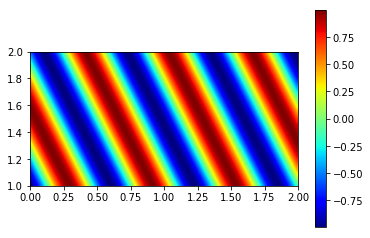

In [9]:
x_min=0
x_max=2
y_min=1
y_max=2
x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 50)
XX,YY= np.meshgrid(x,y)

F=np.sin(10*XX+5*YY)

"""
On utilise trois options inté
attention, par défaut origin='upper' : l'origine est en haut à gauche"""
fig,ax=plt.subplots()
img=ax.imshow(F,origin='lower',extent=[x_min,x_max,y_min,y_max],cmap='jet',interpolation='bilinear')
fig.colorbar(img);

***A vous:*** Augmentez ou diminuer la résolution de l'image (=le nombre de points dans `np.linspace()`). Pourquoi cela ne change pas l'aspect? Qu'elle option de `imshow()` faut-il changer pour que les différences de résolution apparaissent?

***A vous:*** Tracez le graphe des fonctions

* $(x,y)\to \|(x,y)\|_2$  (la norme euclidienne)    
* $(x,y)\to \|(x,y)\|_\infty$ (la norme infinie)    
* $(x,y)\to \|(x,y)\|_1$  (la norme 1)  

On choisira le domaine pour que l'on puisse observer les boulles unités associées à chacune de ces normes. 


In [63]:
"""Aide : Vous aurez besoin d'extraire le maximum. Deux possibilité pour cela:
Maximum terme à terme entre deux listes"""
print(np.maximum([1,2],[0,3]))
"""Maximum d'une liste"""
print(np.max([1,2,3,4])) 

[1 3]
4


### Surface en 3D

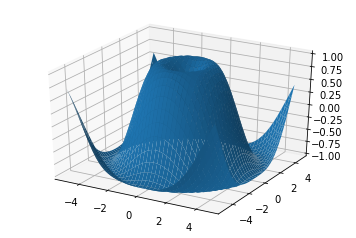

In [69]:
"""cet import est important même si on ne voit nulle part apparaitre 'Axes3D' """
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

"""Données"""
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

""" antialiased=True (option par défaut), produit un artefact visuel"""
surf = ax.plot_surface(X, Y, Z, antialiased=Fause)
ax.set_zlim(-1.01, 1.01);


###  Couleur et 3D

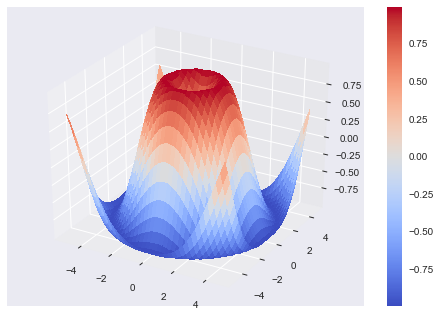

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
surf = ax.plot_surface(X, Y, Z, antialiased=False,cmap="coolwarm")
fig.colorbar(surf);

## Scatter


Un scatter-plot c'est un graphique dont les points ne sont pas reliés. Les points peuvent être représenté par des rond, des croix, des triangles etc. Remarquons que la méthode `.plot(x,y,"o")` effectue déjà un scatter-plot. Cependant la méthode `.scatter()` permet plus de souplesse, notamment cette de faire varier les rayons et les couleurs des points. 

### Un exemple complexe

Effectuons tout de suite un exercice difficile. Nous voulons:

* une image représentant une fonction en niveau de couleur
* sur laquelle se superpose un scatter (=des points répartis sur le plan)
* on veut associé à chaque point une valeur numérique
* que ces points soient colorée en fonction de leur valeur numérique
* on veut que les échelles des couleurs du scatter et de l'image soient cohérantes

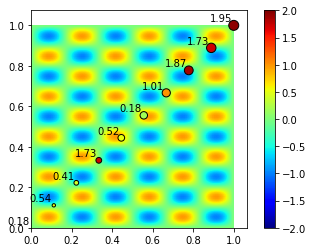

In [101]:
x=np.linspace(0,1,100)
y=x=np.linspace(0,1,100)
XX,YY=np.meshgrid(x,y)
nu1,nu2=3,5

def Fonc(x,y):
    return np.sin(2*np.pi*nu1*x)*np.sin(2*np.pi*nu2*y)

F=Fonc(XX,YY)

""" L'altitude maxi et min commune aux deux graphiques """
zmin=-2
zmax=2
fig,ax=plt.subplots()
img=ax.imshow(F,
           interpolation='bilinear',
           #aspect='auto',# avec aspect='auto' le repére n'est plus orthonormé
           extent=[0,1,0,1], #pour préciser les bornes
           cmap='jet',
           norm=plt.Normalize(vmin=zmin, vmax=zmax),
           origin="lower",   
                      )

xs=np.linspace(0,1,10)
ys=np.linspace(0,1,10)
values=np.random.uniform(0,2,len(xs))

ax.scatter(
    xs, #abscisse
    ys,#ordonnées
    marker='o', #forme
    s=xs*100,   #rayon
    c=values,   # valeur numérique pour la couleur
    cmap='jet', #color map
    edgecolors="k", 
    norm=plt.Normalize(vmin=zmin, vmax=zmax) #l'echelle des couleurs
)


labels=[]
for value in values:
    labels.append("%.2f"%value)

for label, x, y in zip(labels, xs, ys):
    ax.annotate(
        label,
        xy=(x, y), # positionnement
        xytext=(-2, 2), #décallage de la boite texte
        textcoords='offset points', #sinon c'est nimp
        ha='right', va='bottom' #mise en page du texte
    )
    
fig.colorbar(img);

***Exo:*** Comment faut-il modifier `values` pour que les rond aient la même couleur que le fond? 

***Exo:*** Modifiez ce programme pour qu'il y ait un rond par extrémum local, et que la valeur associé à chaque rond soit deux fois la valeur de l'extrémum local. Pour que le graphique soit plus joli vous mettrez tous les ronds avec le même rayon et vous supprimerez les annotations.  Aide: se serait bête (et dur) de calculer numériquement ces extréma locaux!

### Scatter en 3D

C'est un type de graphique vraiment peu clair. 

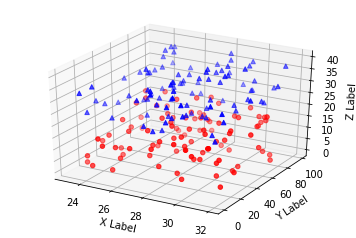

In [110]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

n = 100
def randomPoint(maker,color,z_low,z_high):
    xs = np.random.uniform(size=n,low=23,high=32)
    ys = np.random.uniform(size=n,low=0,high=100)
    zs = np.random.uniform(size=n,low=z_low,high=z_high)
    ax.scatter(xs, ys, zs, c=color, marker= maker)
    
randomPoint("o","r",0,20)
randomPoint("^","b",20,40)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label');

## Animation

Un peu complexe, mais impressionnant. 

### Exemple ici

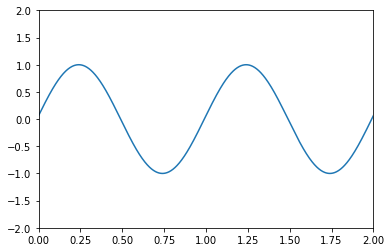

In [48]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
""" ax.plot() renvoie un couple. On récupère le premier élément. 
On fait un graphique vide """
line, = ax.plot([], [])


""" fonction d'animation. Elle est lancée toutes les "frame". 
Son argument 'i' c'est le numéro de la frame"""
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

""" On crée l'animation.
blit=True signifie qu'on ne retrace que la partie ayant changée
interval=20 : on trace une frame toutes les 20 ms
frames=100 : on trace 100 frames avant de boucler
"""
anim = animation.FuncAnimation(fig, animate,frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())

### Exemples d'animations sur le net

Si voulez voir de belle animations, jetez un oeil à ceci: [https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/]. Vous y trouverez 

* La modélisation d'un double pendule
* La modélisation d'un ensemble de particules soumise à des colisions

## Partie fourre-tout



### Les styles prédéfinie

Plein de façons pour changer de style

In [5]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


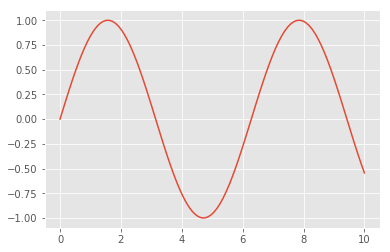

In [6]:
x=np.linspace(0,10,100)
"""un style très utilisé en langage R"""
plt.style.use('ggplot')
plt.plot(x,np.sin(x));

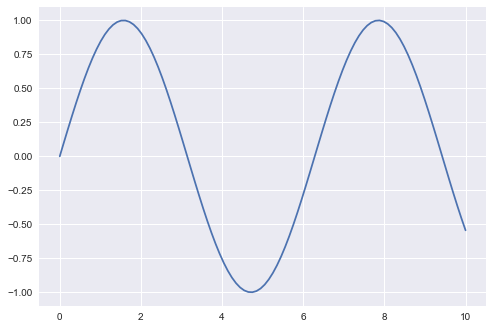

In [7]:
"""le très joli style de la bibliothèque seaborn"""
plt.style.use('seaborn')
plt.plot(x,np.sin(x));

### Son propre style

Il est  aussi possible de régler des paramètre pour toutes les figures de votre programme python, par exemple:

* `plt.rcParams['figure.figsize'] = 5, 10` 
* `plt.rcParams['axes.labelsize'] = 14`
* `plt.rcParams['xtick.labelsize'] = 12`

### Sauvegarder une figure

C'est très simple, il suffit d'utiliser `plt.savefig`. Voici une petite fonction qui fait cela tout en créant un répertoire pour ranger ses figures sauvées.

In [9]:
import os

PROJECT_ROOT_DIR="/toto"  # mettre ici l'adresse absolue de votre projet

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    
    """ les figures seront sauver dans votre projet, dans le sous répertoire 'saved_fig' """
    path_dir = os.path.join(PROJECT_ROOT_DIR,"saved_fig")
    
    """au cas où ce sous-repertoire n'existe pas"""
    if not os.path.isdir(path_dir):
        os.makedirs(path_dir)

    path_file=os.path.join(path_dir,fig_name + "." + fig_extension)
    
    print("Saving figure:", fig_name)
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(path_file, format=fig_extension, dpi=resolution)

### Matplotlib sans jupyter
 
 En python ordinaire, quand vous avez régler tous les paramètres de votre graphiques, il faut ajouter la commande `plt.show()`. Par exemple:
```
fig,ax=plt.subplots()
img=ax.imshow(F,origin='lower')
fig.colorbar(img)
plt.show()
```
Cette commade ouvre la ou les fenêtres graphique. Le programme s'intéromp alors à cet endroit, et se poursuivrai dès que vous fermez la ou les fenêtres graphiques. Il s'ouvre une fenêtre graphique par figure. 

Voici quelques avantages:
* les figures en 3D sont manipulables à la souris. 
* Vous pouvez assi rendre les graphiques interactif avec des boutons, des slider, des click-souris etc.
* la fenêtre graphiques a naturellement quelques boutons comme un boutons pour sauvegarder la figure.

###  La complétion automatique 


* écrivez `fig,ax=plt.subplots()` 
* compilez une première fois (même si cela fait un graphique vide)
* écrivez ensuite `ax.set_` et appuyez sur la touche tabulation, vous verrez toutes les méthodes associées à l'objet `ax` et commençant par `set_` apparaitre. C'est pratique. 

Mais avec `fig,axs=plt.subplots(2,1,1)` cela ne marchera pas immédiatement, car `axs` est un tableau numpy. Par contre en faisant `ax0=axs[0]` puis en compilant. L'objet `ax0` sera complétable.  

Si vous travaillez avec un bonne IDE (ex: pycharm), la complétion automatique est bien plus puissante. Pas besoin de compiler au milieu notamment. 

### Matplotlib et pandas

matplotlib est utilisé par d'autre bibliothèques très connue. 

In [3]:
import pandas as pd
size=100
nbPiece=np.random.randint(1,5,size=size)
surface=np.random.randint(5,15,size=size)*nbPiece
price=np.random.randint(100,300,size=size)*surface
df = pd.DataFrame({
    'nbPiece': nbPiece,
    'surface': surface,
    'price': price,
})
df.head()

,nbPiece,surface,price
0,4,32,6624
1,3,27,6345
2,1,5,720
3,1,6,1566
4,3,15,2985


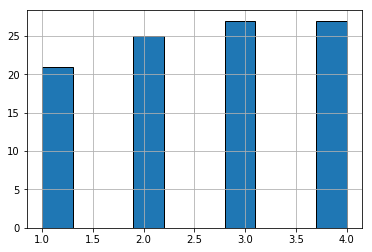

In [53]:
"on voit que df.hist() est équivalent à plt.hist()"
df['nbPiece'].hist(edgecolor="k")

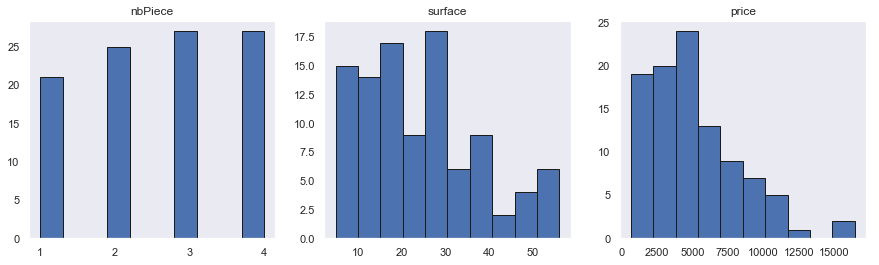

In [60]:
"et comme on est fort en matplot lib, on peut personnaliser"

plt.subplot(1,3,1)
ax1=df['nbPiece'].hist(edgecolor="k");
#on peut aussi récupérer la boite-graphique avec
#ax1=plt.gca()
ax1.set_xticks([1,2,3,4])
ax1.set_title('nbPiece')

plt.subplot(1,3,2)
ax2=df['surface'].hist(edgecolor="k");
ax2.set_title('surface')

plt.subplot(1,3,3)
ax3=df['price'].hist(edgecolor="k");
ax3.set_title('price')

[ax.grid(False) for ax in [ax1,ax2,ax3]]

fig=plt.gcf()
fig.set_size_inches(15,4)

### Matplotlib et seaborn

seaborn utilise et enrichit matplotlib. 

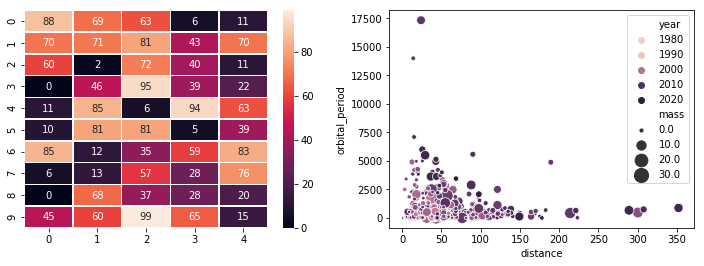

In [2]:
import seaborn as sns

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))

rand_mat1=np.random.randint(0,100,size=(10,5))
sns.heatmap(rand_mat1, annot=True, fmt="d", linewidths=.5,ax=ax1)

planets = sns.load_dataset("planets")
sns.scatterplot(x="distance", y="orbital_period",hue="year", size="mass",
                      sizes=(10, 200),
                     data=planets,ax=ax2);

Dans les exemple que l'on voit sur internet, l'interaction entre ces bibliothèques tierce et matplotlib se fait beaucoup avec la syntaxe implicite. Par exemple pour la figure précédente: 
```
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(...)

plt.subplot(1,2,2)
sns.scatterplot(...)
```
et bien sur, il faut enlever `ax=ax1` et `ax=ax2` à la fin des fonction `seaborn`.





### Bibliothèques concurentes
